In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# import cv2
# import numpy as np
# import os
# import matplotlib.pyplot as plt

# # Set paths for the images
# template_path = os.path.join(os.getcwd(), 'data', 'images', 'template.jpeg')
# #image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')
# image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')

# # Load the images in grayscale
# image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)



# # Check if images are loaded correctly
# if image is None or template is None:
#     print("Error: Could not read the images.")
# else:
#     # Get the dimensions of the template
#     w, h = template.shape[::-1]

#     # Apply template matching
#     result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

#     # Set a threshold for detecting matches
#     threshold = 0.8
#     locations = np.where(result >= threshold)

#     # Draw rectangles around matches
#     for point in zip(*locations[::-1]):
#         cv2.rectangle(image, point, (point[0] + w, point[1] + h), (0, 255, 0), 2)

#     # Display the result
#     plt.imshow(image, cmap='gray')
#     plt.title('Pattern Matching Result')
#     plt.axis('off')
#     plt.show()


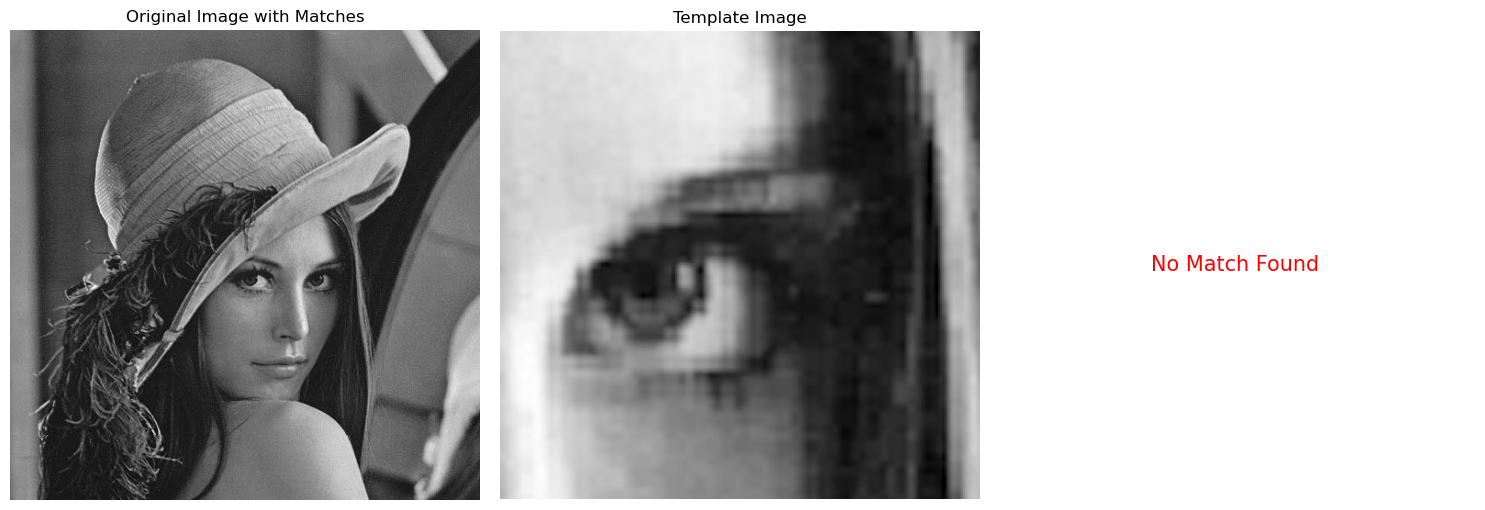

In [58]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set paths for the images
template_path = os.path.join(os.getcwd(), 'data', 'images', 'template.jpeg')

# Define paths to images
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')

# Load the images in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)

# Check if images loaded correctly
if image is None or template is None:
    print("Error: Could not read one of the images.")
    exit()

# Resize the template if necessary
# Adjust size based on the original image dimensions
# small_template = cv2.resize(template, (template.shape[1] // 20, template.shape[0] // 20), interpolation=cv2.INTER_AREA)

# Apply template matching
result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

# Set a threshold for detecting matches
threshold = 0.7  # Try lowering the threshold
locations = np.where(result >= threshold)

# Check if any matching locations are found
match_found = len(locations[0]) > 0

# Draw rectangles around matched locations
for pt in zip(*locations[::-1]):  # Switch columns and rows
    cv2.rectangle(image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 255, 0), 2)

# Display results
plt.figure(figsize=(15, 5))

# Display the original image with matches
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image with Matches')
plt.axis('off')

# Display the original template image
plt.subplot(1, 3, 2)
plt.imshow(template, cmap='gray')
plt.title('Template Image')
plt.axis('off')

# Display match result
plt.subplot(1, 3, 3)
if match_found:
    plt.text(0.5, 0.5, 'Match Found', fontsize=15, ha='center', va='center', color='green')
else:
    plt.text(0.5, 0.5, 'No Match Found', fontsize=15, ha='center', va='center', color='red')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()
